In [1]:
import numpy 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import glob
import os


In [7]:
GSL=pd.read_csv('/Users/smoron/Documents/1.Projects/Global_Sea_level/GSL_selected_dataset.csv', sep=',')
#GSL

In [8]:
database=np.unique(GSL.Database)
database

array(['ICORDS', 'ICORDS-NDB', 'Jones', 'NWS'], dtype=object)

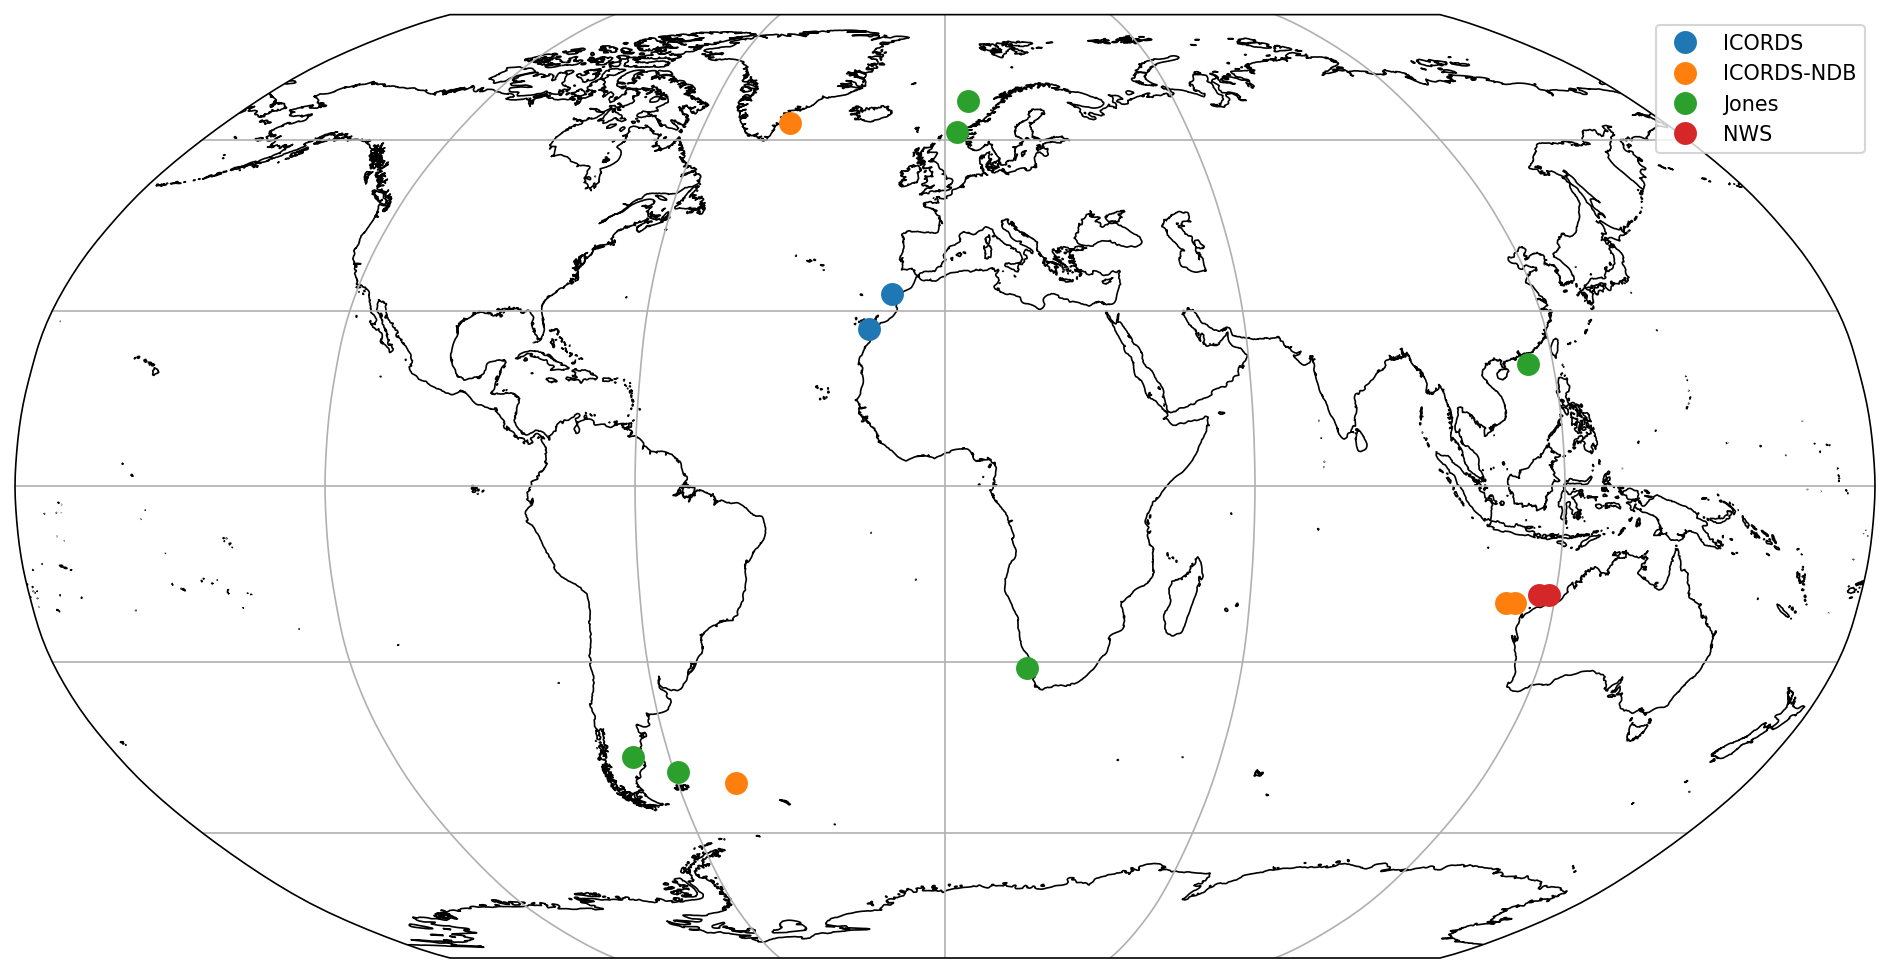

In [13]:
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=ccrs.Robinson())
#Also could use PlateCarree or Mercator, both of these are supported with gridline labels

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img()
#There is something wrong with the data point in Africa

ax.gridlines()#draw_labels=True for gridline labels on supported projections above


for i in database:
    ax.plot(GSL.Long[GSL.Database==i],GSL.Lat[GSL.Database==i], 'o', markersize=10, transform=ccrs.PlateCarree(),zorder=4, label=i)

ax.legend()

In [5]:
#NWS
delambre=pd.read_table('./NWS_curated/delambre1.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
phoenix=pd.read_table('./NWS_curated/phoenix1.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
#Jones
Jones=os.listdir('./Jones_et_al_2004_wells/formatted well data/')
Jones_folder = np.sort(glob.glob('./Jones_et_al_2004_wells/formatted well data/*.txt'))
Jones_list = []
for file_name in Jones_folder:
    df = pd.read_table(file_name,  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
    Jones_list.append(df)
#Neptune
NSB_Rank_1=os.listdir('./NSB/NSB_Rank_1/')
NSB_Rank_1_folder = np.sort(glob.glob('./NSB/NSB_Rank_1/*.csv'))
NSB_Rank_1_list = []
for file_name in NSB_Rank_1_folder:
    df = pd.read_csv(file_name, sep=',')
    NSB_Rank_1_list.append(df)


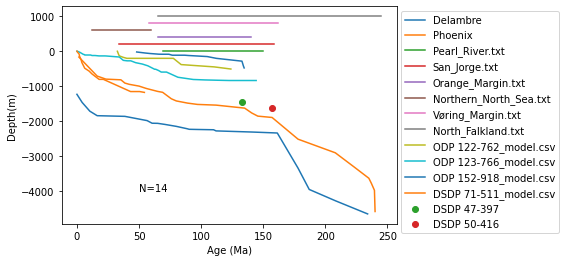

In [21]:
#NWS
plt.plot(delambre.bottom_age, delambre.bottom_depth*-1, label='Delambre' )
plt.plot(phoenix.bottom_age, phoenix.bottom_depth*-1, label='Phoenix' )
#Jones
for i in np.arange(0,len(Jones_list),1):
    plt.plot((min(Jones_list[i]['bottom_age']), max(Jones_list[i]['bottom_age'])), (i*200,i*200), label=Jones[i])
#Neptune
for i in np.arange(0,len(NSB_Rank_1_list),1):
    plt.plot(NSB_Rank_1_list[i]['Age (Ma)'], NSB_Rank_1_list[i]['Depth (mbsf)']*-1, label=NSB_Rank_1[i])
#Icords
plt.plot(132.90, -1453, 'o', label='DSDP 47-397')
plt.plot(157.30, -1624, 'o', label='DSDP 50-416')
plt.text(50, -4e3, 'N='+str(len(GSL.Database)))
plt.ylabel('Depth(m)')
plt.xlabel('Age (Ma)')
plt.legend(bbox_to_anchor=(1.5, 1))